In [26]:
from tensorflow.keras.utils import load_img, image_dataset_from_directory
import json
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import array_to_img
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D
from tensorflow.keras import optimizers 

-----------------
Read train and test sets

In [27]:
training_set = [(i, l) for i, l in image_dataset_from_directory('trafficsigns/train', image_size = (128, 128), batch_size = None, seed = 123)]
test_set = [(i, l) for i, l in image_dataset_from_directory('trafficsigns/test', image_size = (128, 128), batch_size = None, seed = 123)]

with open("classlabels.txt") as infile:
    labels = dict((int(i), j) for i, j in json.loads(infile.read()).items())
print("The 20 classes are: " + ", ".join(str(l) for l in labels.values()))

Found 1792 files belonging to 20 classes.
Found 1022 files belonging to 20 classes.
The 20 classes are: limit30, limit50, limit60, limit80, noleft, noright, nouturn, gostraight, goleft, goright, keepright, roundabout, danger, pedestrcross, bikecross, childcross, traincross, construction, nostopping, noentry


-----------
Select labels

In [28]:
labels_to_keep = [0, 6, 4, 18] # Change this to determine which labels to keep (or change to list(range(20)) to keep all labels)
num_classes = len(labels_to_keep)

x_train = np.array([image for image, label in training_set if label in labels_to_keep])
y_train = np.array([labels_to_keep.index(label) for image, label in training_set if label in labels_to_keep])
x_test = np.array([image for image, label in test_set if label in labels_to_keep])
y_test = np.array([labels_to_keep.index(label) for image, label in test_set if label in labels_to_keep])

finallabels = dict([(i, labels[l]) for i, l in enumerate(labels_to_keep)])
print("The " + str(num_classes) + " classes are: " + ", ".join(str(l) for l in finallabels.values()))

The 4 classes are: limit30, nouturn, noleft, nostopping


In [29]:
# RGB images have a depth of 3
x_train.shape

(564, 128, 128, 3)

In [30]:
x_test.shape

(402, 128, 128, 3)

In [31]:
# Normalize pixel values to be between 0 and 1 by dividing by 255. 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

------------
Plot example data

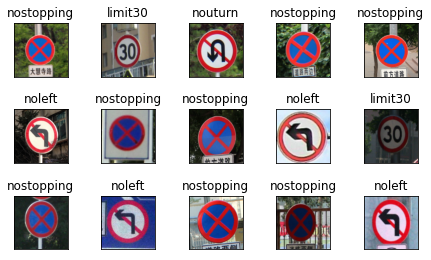

In [32]:
fig = plt.figure()
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.tight_layout()
    img = array_to_img(x_train[i])
    plt.imshow(img)
    plt.title(finallabels[y_train[i]])
    plt.xticks([])
    plt.yticks([])
plt.savefig("visualizations/example-data.png",bbox_inches='tight')

In [33]:
# check the number of samples
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

564 train samples
402 test samples


In [34]:
def build_fully_connected(input_shape, num_classes):
    """
    Create a fully-connected model to train or test on UC Merced dataset.
    """
    model = Sequential()
    model.add(Flatten(input_shape=(128, 128, 3)))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [35]:
# Build, compile, and fit the model
model = build_fully_connected(input_shape=x_train.shape[1:4], num_classes=4)
adam = optimizers.Adam(lr=0.0001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1,  validation_data=(x_test, y_test))

Epoch 1/10


C:\Users\Christina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


18/18 [==============================] - 3s 133ms/step - loss: 1.8459 - accuracy: 0.6011 - val_loss: 0.9056 - val_accuracy: 0.7363
Epoch 2/10
18/18 [==============================] - 2s 102ms/step - loss: 0.4294 - accuracy: 0.8511 - val_loss: 0.6162 - val_accuracy: 0.7612
Epoch 3/10
18/18 [==============================] - 2s 103ms/step - loss: 0.2342 - accuracy: 0.9309 - val_loss: 0.6925 - val_accuracy: 0.7662
Epoch 4/10
18/18 [==============================] - 2s 106ms/step - loss: 0.1589 - accuracy: 0.9628 - val_loss: 0.6136 - val_accuracy: 0.8060
Epoch 5/10
18/18 [==============================] - 2s 101ms/step - loss: 0.1029 - accuracy: 0.9840 - val_loss: 0.7039 - val_accuracy: 0.8109
Epoch 6/10
18/18 [==============================] - 2s 103ms/step - loss: 0.0815 - accuracy: 0.9858 - val_loss: 0.6751 - val_accuracy: 0.8159
Epoch 7/10
18/18 [==============================] - 2s 100ms/step - loss: 0.0690 - accuracy: 0.9894 - val_loss: 0.7078 - val_accuracy: 0.8010
Epoch 8/10
18/18 

13/13 - 0s - loss: 0.7384 - accuracy: 0.8109 - 420ms/epoch - 32ms/step


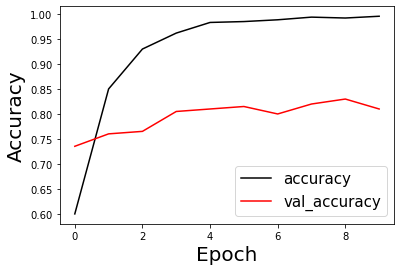

In [36]:
plt.plot(history.history['accuracy'], label='accuracy', color = 'k')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy', color = 'r')
plt.xlabel('Epoch', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(loc='lower right', fontsize=15)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
#plt.savefig("visualizations/accuracy_epoch.png",bbox_inches='tight')

13/13 - 0s - loss: 0.7384 - accuracy: 0.8109 - 478ms/epoch - 37ms/step


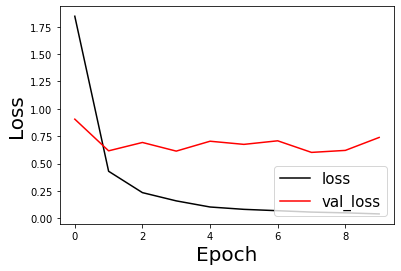

In [37]:
plt.plot(history.history['loss'], label='loss', color = 'k')
plt.plot(history.history['val_loss'], label = 'val_loss', color = 'r')
plt.xlabel('Epoch', size=20)
plt.ylabel('Loss', size=20)
plt.legend(loc='lower right', fontsize=15)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
#plt.savefig("visualizations/loss_epoch.png",bbox_inches='tight')